In [1]:
import os, multiprocessing
from tqdm import tqdm

In [2]:
data_dir = 'data/train_images'
dir_list = os.listdir(path=data_dir)
len(dir_list)

189800

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

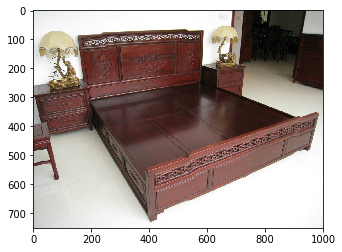

In [4]:
image = Image.open(os.path.join(data_dir,dir_list[0]))
plt.imshow(image)

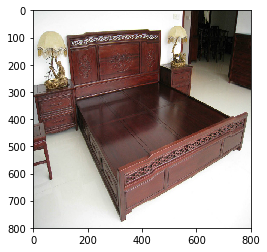

In [5]:
image_resized = image.resize((800,800))
plt.imshow(image_resized)

In [6]:
image_list = list(image_resized.getdata())
image_array = np.array(image_list,dtype='uint8')
image_array.shape

(640000, 3)

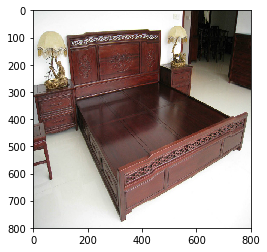

In [7]:
image_array = image_array.reshape((800,800,3))
plt.imshow(image_array)

In [8]:
#get image_id and image_label
image_id_label = dir_list[0].split('.')[0].split('_')
image_id = image_id_label[0]
image_label = image_id_label[1]

In [10]:
data={'image_id':image_id,'image_label':image_label,'image_data':image_array}
image_dataset = np.array(data)
image_dataset

array({'image_id': '100001', 'image_label': '70', 'image_data': array([[[220, 226, 224],
        [220, 226, 224],
        [221, 227, 225],
        ..., 
        [172, 173, 168],
        [174, 175, 170],
        [174, 175, 170]],

       [[223, 229, 227],
        [223, 229, 227],
        [223, 229, 227],
        ..., 
        [171, 173, 168],
        [172, 174, 169],
        [173, 174, 169]],

       [[225, 231, 229],
        [225, 231, 229],
        [224, 230, 228],
        ..., 
        [171, 173, 168],
        [172, 174, 169],
        [172, 174, 169]],

       ..., 
       [[192, 201, 196],
        [194, 200, 196],
        [194, 200, 196],
        ..., 
        [238, 240, 239],
        [238, 240, 239],
        [238, 240, 239]],

       [[192, 201, 196],
        [192, 201, 196],
        [194, 200, 196],
        ..., 
        [239, 241, 240],
        [239, 241, 240],
        [239, 241, 240]],

       [[190, 201, 195],
        [190, 201, 195],
        [192, 201, 196],
        ..., 
    

In [33]:
def image_reshaping(index):
    image = Image.open(os.path.join(data_dir,dir_list[index]))
    image_resized = image.resize((800,800))
    image_list = list(image_resized.getdata())
    image_array = np.array(image_list,dtype='uint8')
    image_array = image_array.reshape((800,800,3))
    return image_array

In [34]:
def reshape_and_save(index):
    image_array = image_reshaping(index)
    temp = np.load('temp.npy')
    np.append(temp,image_array)
    np.save(temp,'temp.npy')